# Logistic Regression: Classification

<div>
   <img src="https://github.com/thomasmanke/ABS/raw/main/figures/ANN_LogisticRegression.jpg",  width="1000">
</div>

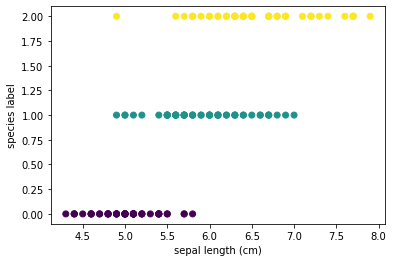

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import tensorflow as tf

iris = datasets.load_iris() 
X = iris.data      # 4 features per sample
y = iris.target    # species label

plt.scatter(X[:,0], y, c=y)
plt.xlabel(iris.feature_names[0])
plt.ylabel('species label')
plt.show()

Now aim to predict a specific flower species (label y) from length measurements (data X)

We can use the previous workflow for linear regression with only minor changes -- to turn it into a classification tool.

1. allow for multidimensional features as input (e.g. all 4 length measurements)
2. make probabilistic predictions y in [0,1]
3. adjust the cost function


## Define the Data

In [3]:
# define data
X = iris.data         # What is the shape of X? How many samples?
y = (iris.target==2)  # What is iris.target? What is this equation ?
y = y.astype(int)     # binarize y for class of choice
nc = 1                # number of classes

input_shape = (1,)    # shape of X - without samples
if (X.ndim > 1):
  input_shape = X.shape[1:]

## Inspect Data

## Define the Model

In [ ]:
# check shapes frequently!
print('input_shape: ', input_shape)
print('X.shape:     ', X.shape)
print('y.shape:     ', y.shape)
print('classes:     ', nc)

model = tf.keras.Sequential(name='my_log_model')
model.add( tf.keras.layers.Dense(nc, input_shape = input_shape,
                                 activation = 'sigmoid',
                                 name='1st_layer'))

# define optimizer and loss
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['binary_accuracy'])

# see and understand the number of parameters
model.summary()  

input_shape:  (4,)
X.shape:      (150, 4)
y.shape:      (150,)
classes:      1
Model: "my_log_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 1st_layer (Dense)           (None, 1)                 5         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


Some definitions
- known labels: $y_i \in \{0,1\}$
- predicted labels:  $\hat y_i \in [0,1]$
- accuracy: fraction of true assignments
- cross-entropy (per sample $i$)
$$y_i \log(\hat y_i) + (1 - y_i) \log(1-\hat y_i) \longrightarrow $$
Average the above over all samples  $i$ 

. 

## Inspecting the fit

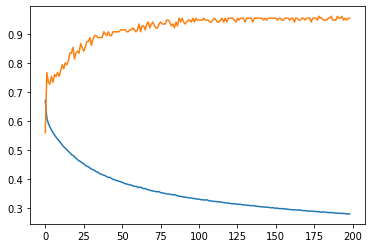

In [ ]:
fh = model.fit(X, y, epochs=200, verbose=0)
plt.plot(fh.history['loss'][1:])
plt.plot(fh.history['binary_accuracy'][1:])
plt.show()

**Notice**: If you run the above code cell repeatedly (without redefining the model), the fit the loss will continue to decrease.

### Task (20 min): Evaluations, Predictions and Confusion

Understand the values and the shape of the predictions. 
Compare them to the observed label (use confusion matrix)

In [ ]:
%%script echo edit before execution
eval = model.evaluate(...)
print('[loss, accuracy] = ', eval)

yp = model.predict( ... ) 

# Inspect and understand the values in yp and compare them to y
print('y.shape:  ', y.shape)
print('yp.shape: ', yp.shape)
print('y[45:55]: ',  y[45:55])
print('yp[45:55]: ', yp[45:55])

Run the code below and inspect the confusion matrix

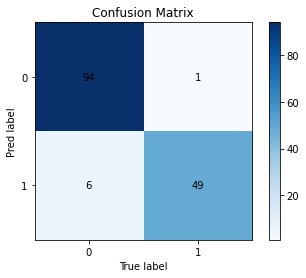

In [ ]:
%%script echo Ensure yp is defined before execution
from sklearn.metrics import confusion_matrix
# my plot function for cm
def plot_cm(mat):
  classes = np.arange(cm.shape[0])
  plt.imshow(mat, cmap=plt.cm.Blues)
  for (j,i),label in np.ndenumerate(mat):
    plt.text(i,j,np.round(label,2),ha='center',va='center')

  plt.colorbar()
  plt.title('Confusion Matrix')
  plt.xlabel('True label')
  plt.ylabel('Pred label')
  plt.xticks(classes)
  plt.yticks(classes)
  plt.show()


cm = confusion_matrix(yp>=0.5, y)
plot_cm(cm)

## Group Task (30 min): Repeat

Change the code above to fit a model and predict another species. Track the fit performance (model loss) and report the final confusion analysis.

What could you do to improve performance?

# Predicting Multiple Classes

<div>
   <img src="https://github.com/thomasmanke/ABS/raw/main/figures/ANN_Softmax.jpg",  width="1000">
</div>

### Data

In [ ]:
# define data
X  = iris.data    # What is the shape of X? How many samples?
y  = iris.target  # What is iris.target? What is this equation ?
nc = 3            # number of classes

input_shape = (1,)    # shape of X - without samples
if (X.ndim > 1):
  input_shape = X.shape[1:]

## Preliminaries

The following will be almost identical to logistic regression (predicting one class label) with only small changes

### Softmax:  $z \to \hat y$

The softmax operation transforms a score vector (z) into a vector of probabilities ($\hat y$):

$$\hat y_l = \frac{\exp(z_l)}{\sum_k \exp(z_k)}$$

Elements of $z$ are real number (with any sign), but this definition ensures that $\hat y_l \ge 0$ and $\sum_l \hat y_l = 1$

### Cross-Entropy Loss

For a given sample, we have the known annotations $y$ and the probabilistic predictions ($\hat y)$ from the model.

For $k$ categories both vectors a $k$-dimensional.
You may think of the true label $y$ as "one-hot encoded" For example:

$$y = (0,0,1,0,0,0)$$

Where the $1$ denotes the true class label: the third out of six in this example.

The loss for a given sample is defined as

$$l(y, \hat y)= - \sum_l^k y_l \log \hat y_l$$

Notice that this sum is non-zero only for a single term from the correct class (where $y_l=1$). Moreover, if the model prediction $\hat y_l$ was certain for that class and that specific sample, then $l((y, \hat y) = -\log(\hat y_l) = 0$. In general the loss will be larger than 0.

The total loss will be the average over all samples losses.

## Model

In [ ]:
print('input_shape: ', input_shape)
print('X.shape:     ', X.shape)
print('y.shape:     ', y.shape)
print('classes:     ', nc)

# keras has many predefined loss functions and metrics
loss_name='sparse_categorical_crossentropy'   # for integer labels
acc='sparse_categorical_accuracy'             # additional metrics to track

model = tf.keras.Sequential(name='my_softmax_model')
model.add( tf.keras.layers.Dense(nc, input_shape = input_shape,
                                 activation = 'softmax',
                                 name='1st_layer'))


# define optimizer and loss
model.compile(optimizer='sgd', loss=loss_name, metrics=[acc])

 

input_shape:  (4,)
X.shape:      (150, 4)
y.shape:      (150,)
classes:      3
Model: "my_softmax_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 1st_layer (Dense)           (None, 3)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


## Group task (30 min): Fit and Evaluate the model

- Summarize the model and understand the number of parameters
- Inspect the fit history and evaluate the model: has it converged?
- run a prediction: yp = model.predict(X). Understand the output.
- How would you predict the label based on yp
- Look at the corresponding confusion matrix

In [ ]:
%%script echo Edit before execution
# see and understand the number of parameters
... show model summary ...

fh= model.fit(....)

# plot fit history: loss and accuracy
...

eval = model.evaluate(...)
print('[loss, accuracy] = ', eval)

yp = model.predict( ... )

... inspect yp ...

yp1 = ... predict label ...


cm = confusion_matrix(yp1, y)
plot_cm(cm)

# Computational Challenges: Propagation and Backpropagation

<div>
   <img src="https://github.com/thomasmanke/ABS/raw/main/figures/ANN_ComputationalChallenges.jpg",  width="1000">
</div>